In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# Load the mtcars dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/mtcars.csv'
mtcars = pd.read_csv(url)

In [5]:
# Define the target variable based on median MPG
median_mpg = mtcars['mpg'].median()
mtcars['mpg_class'] = np.where(mtcars['mpg'] > median_mpg, 1, 0)  # 1: High MPG, 0: Low MPG

In [7]:
# Select features and target
X = mtcars[['wt', 'hp']].values  # Features: weight and horsepower
y = mtcars['mpg_class'].values   # Target: High (1) or Low (0) MPG

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Compute class-wise means and overall mean
mean_0 = np.mean(X_train[y_train == 0], axis=0)  # Mean of class 0
mean_1 = np.mean(X_train[y_train == 1], axis=0)  # Mean of class 1

In [13]:
# Compute covariance matrix
cov_matrix = np.cov(X_train.T)

In [15]:
# Compute the inverse of the covariance matrix
cov_inv = np.linalg.inv(cov_matrix)

In [17]:
# Compute linear discriminant coefficients
weights = cov_inv @ (mean_1 - mean_0)
bias = -0.5 * (mean_1 @ cov_inv @ mean_1.T - mean_0 @ cov_inv @ mean_0.T) + np.log(np.mean(y_train == 1) / np.mean(y_train == 0))

In [19]:
# Define the linear discriminant function
def linear_discriminant(X):
    return X @ weights + bias

In [21]:
# Make predictions
y_train_pred = (linear_discriminant(X_train) > 0).astype(int)
y_test_pred = (linear_discriminant(X_test) > 0).astype(int)

In [23]:
# Evaluate the classifier
print("Training Set Performance")
print(classification_report(y_train, y_train_pred))

print("Testing Set Performance")
print(classification_report(y_test, y_test_pred))

Training Set Performance
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25

Testing Set Performance
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



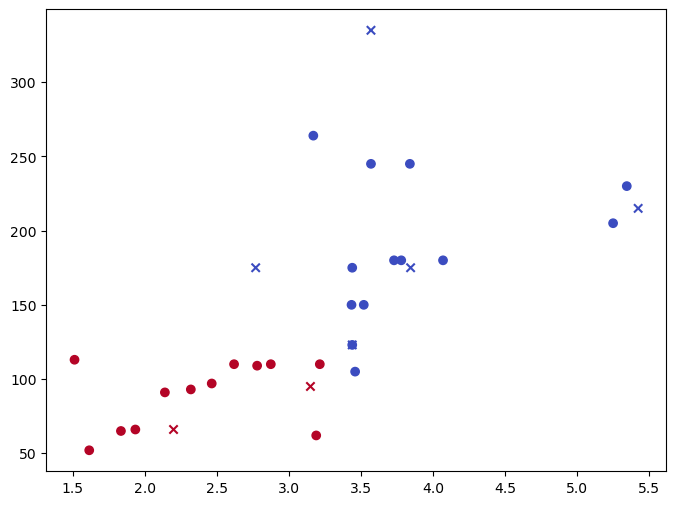

In [25]:
# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm', marker='x', label='Test Predictions')

In [27]:
# Generate decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 10, X[:, 1].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
decision_boundary = linear_discriminant(grid).reshape(xx.shape)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


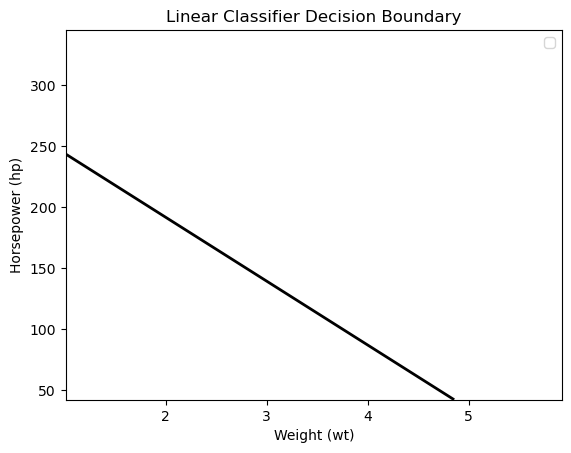

In [29]:
plt.contour(xx, yy, decision_boundary, levels=[0], linewidths=2, colors='black')
plt.xlabel('Weight (wt)')
plt.ylabel('Horsepower (hp)')
plt.title('Linear Classifier Decision Boundary')
plt.legend()
plt.show()